In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from naiver_bayes_klassifizierer import NaiveBayes  # Assuming you have the NaiveBayes class in a separate .py file

In [6]:
# Load dataset
df = pd.read_csv('inflammation_diagnosis.csv', delimiter=';')

In [7]:
# Showing few rows of the dataset to understand the data
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   temperature nausea lumbar_pain urine_pushing micturition_pains  \
0         35.5     no         yes            no                no   
1         35.9     no          no           yes               yes   
2         35.9     no         yes            no                no   
3         36.0     no          no           yes               yes   
4         36.0     no         yes            no                no   

  burning_of_urethra inflammation nephritis  
0                 no           no        no  
1                yes          yes        no  
2                 no           no        no  
3                yes          yes        no  
4                 no           no        no  


In [8]:
# Displaying the columns of the dataset
print(df.columns)

Index(['temperature', 'nausea', 'lumbar_pain', 'urine_pushing',
       'micturition_pains', 'burning_of_urethra', 'inflammation', 'nephritis'],
      dtype='object')


In [9]:
# Step 1: Create 'disease' column
# If either 'inflammation' or 'nephritis' is True, the person has a disease
df['disease'] = df.apply(lambda row: row['inflammation'] or row['nephritis'], axis=1)

In [10]:
# Drop original 'inflammation' and 'nephritis' columns now they are combined
df.drop(columns=['inflammation', 'nephritis'], inplace=True)

In [11]:
# Showing first few row after processing the data
print("\nData after adding 'disease' column and dropping 'inflammation' and 'nephritis':")
print(df.head())


Data after adding 'disease' column and dropping 'inflammation' and 'nephritis':
   temperature nausea lumbar_pain urine_pushing micturition_pains  \
0         35.5     no         yes            no                no   
1         35.9     no          no           yes               yes   
2         35.9     no         yes            no                no   
3         36.0     no          no           yes               yes   
4         36.0     no         yes            no                no   

  burning_of_urethra disease  
0                 no      no  
1                yes     yes  
2                 no      no  
3                yes     yes  
4                 no      no  


In [12]:
# Step 2:Seprate data into features and target
X = df.drop(columns=['disease'])  # features (all columns except 'disease')
y = df['disease']  # target (the 'disease' column)

In [13]:
# Step 3: Split data into training and testing sets [80% train, 20% test]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Showing size of training and testing data
print(f"\nTraining data size: {X_train.shape[0]} samples")
print(f"Test data size: {X_test.shape[0]} samples")


Training data size: 96 samples
Test data size: 24 samples


In [15]:
# Step 4: Initialize and train Naive_Bayes model
nb = NaiveBayes()
nb.fit(X_train, y_train)

In [16]:
# Step 5: Evaluting model on the test set
accuracy = nb.evaluate_on_data(X_test, y_test)
print(f"\nModel accuracy on the test set: {accuracy * 100:.2f}%")


Model accuracy on the test set: 91.67%


In [17]:
# Step 6: Predicting on test set
y_pred = nb.predict(X_test)

In [18]:
# Step 7: Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)


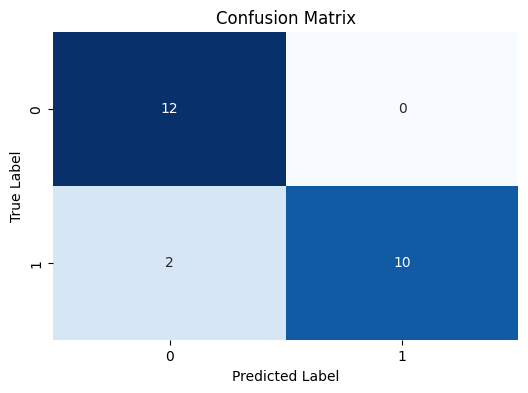

In [19]:
# Step 8: Ploting confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()